In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
data = pd.read_csv("amazon_cells_labelled.txt", delimiter= '\t', header=None)
data.columns = ['review', 'pos']

In [79]:
data.head()

,review,pos
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [82]:
#list(data[data.pos == 1].review)  #all complete pos feedback #list shows full content

#list(data[data.pos == 0].review)

In [93]:
# Feature Engineering 

pos_keywords = ['good', 'best', 'excellent', 'fine', 'nice', 'great', 
               'satisfied', 'fulfill', 'love', 'eas', 'happy', 'excellent', 
               'recommend', 'impressed', 'incredible', 'well', 'awesome', 'cool',
               'fantastic', 'sturdy' ]

# ':-)' in the keywords created an error

for key in pos_keywords:
    data[str(key)] = data.review.str.contains(' '+ str(key), case=False)

In [85]:
#data.head()

In [94]:
pos_intensifiers = ['very', 'pretty', 'highly', 'really', 'perfectly']

for key in pos_intensifiers: 
    data[str(key)] = data.review.str.contains(' ' + str(key) + ' ', case=False)

In [88]:
#data.head()

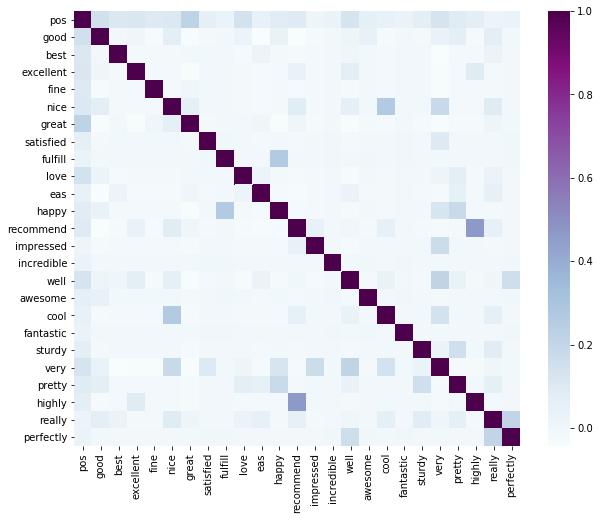

In [95]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), cmap='BuPu')

In [96]:
# Training data 

X = data[pos_keywords + pos_intensifiers]
y = data.pos

In [97]:
X.head()

,good,best,excellent,fine,nice,great,satisfied,fulfill,love,eas,...,well,awesome,cool,fantastic,sturdy,very,pretty,highly,really,perfectly
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [98]:
# Binary data - Bernoulli

from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB() # instantiate

# fit model 
bnb.fit(X, y)

y_pred =  bnb.predict(X)

In [100]:
print("Number of mislabeled points out of total {} points: {}".format(
X.shape[0], (y != y_pred).sum()))

Number of mislabeled points out of total 1000 points: 298


In [103]:
data_yelp = pd.read_csv('yelp_labelled.txt', delimiter='\t', header=None)
data_yelp.columns = ['review', 'pos']

In [104]:
data_yelp.head()

,review,pos
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [105]:
y_yelp = data_yelp.pos

In [106]:
bnb.fit(X, y_yelp) 

y_yelp_pred = bnb.predict(X)

In [107]:
print("Trained Amazon model, tested on Yelp. \nNumber of mislabeled points in the yelp data, \
out of total {} points: {}".format(
X.shape[0], (y != y_yelp_pred).sum()))

Trained Amazon model, tested on Yelp. 
Number of mislabeled points in the yelp data, out of total 1000 points: 341
